In [40]:
from djccx.frd.readfrd import readfrd
from matplotlib import pyplot as plt
from validation.FullExperimental import FullExperimental
import os, glob
import numpy as np

In [41]:
params = {
            "geo" : {
                        "t_n" : 3.05701,
                        "t_l" : 0.45658,
                        "Lx"  : 30,
                        "Ly"  : 25,
                        "meshsizefactor" : 1.2,
                    },
            "sim" : {
                        "disp" : 0.5,
                    },
            "tensile" : {
                        "disp" : 2.0,
                    },
        }



In [42]:
epsilon_tensile = params["tensile"]["disp"] / params["geo"]["Ly"]
eps_span = np.linspace(0, epsilon_tensile, 4)
print(eps_span)

[0.         0.02666667 0.05333333 0.08      ]


In [43]:
from AnalyticalLayers.models import Tau_model

In [44]:
composition = [
        ["Y", "Y"],
        ["Y", "X"],
        ["Y", "SX"],
        ["Y", "SY"],
        ["Y", "SX" , "SY"],
        ["Y", "X"  , "SY"]
    ]
ni = [ len(c) for c in composition ]

In [45]:
tn = params["geo"]["t_n"]
tl = params["geo"]["t_l"]
Lx = params["geo"]["Lx"]

tt = [ Tau_model(tn,tl,ini) for ini in ni ]
tt = np.array(tt)
tt

array([4.88333, 4.88333, 4.88333, 4.88333, 5.79649, 5.79649])

In [46]:
Lx

30

In [47]:
tt

array([4.88333, 4.88333, 4.88333, 4.88333, 5.79649, 5.79649])

In [48]:
df_exp = FullExperimental() 

In [49]:
df_exp.pop("Eb [GPa]")
df_exp.pop("Et [GPa]")
df_exp.pop("Vc")

Name
TFP1    0.178
TFP2    0.164
TFP3    0.135
TFP4    0.144
TFP5    0.146
TFP6    0.180
Name: Vc, dtype: float64

In [50]:
df_exp

% e              St [MPa]               t [mm]            \
          mean       std        mean        std      mean       std   
Name                                                                  
TFP1  0.123306  0.009827  279.103333  14.337700  5.266667  0.057735   
TFP2  0.087556  0.002840  153.360000   0.473181  4.700000  0.000000   
TFP3  0.087444  0.002164  137.113333   4.996812  4.833333  0.057735   
TFP4  0.095472  0.005491  184.396667   1.356515  4.700000  0.000000   
TFP5  0.089889  0.013757   99.990000   9.790138  5.700000  0.000000   
TFP6  0.089083  0.010304  104.513333   7.708893  5.600000  0.000000   

         b [mm]              Sb [MPa]                  layers  
           mean       std        mean        std               
Name                                                           
TFP1  25.600000  0.100000  134.996667  18.942693          [Y]  
TFP2  25.566667  0.057735  117.430000  15.759607       [Y, X]  
TFP3  25.400000  0.173205  128.053333   5.337905      [Y, SX]  
TFP4  25.666667  0.152753  141.703333   7.525386      [Y, SY]  
TFP5  25.166667  0.152753  107.433333   3.902939  [Y, SX, SY]  
TFP6  25.033333  0.635085  114.306667  11.800790   [Y, X, SY]

In [51]:
St = df_exp["St [MPa]"]["mean"]

In [52]:
St = np.array([256.88057426,  # TFP1
               146.37908435,  # TFP2
               130.73891314,  # TFP3
               183.43036528,  # TFP4
               106.30559521,  # TFP5
               112.76523383]) # TFP6

In [53]:
Sb = np.array

In [54]:
import pandas as pd

results = pd.read_csv("output.csv")

In [55]:
frds = glob.glob("output/*/sim/*.frd")
inps = glob.glob("output/*/sim/*.inp")


In [56]:
from djccx.inp.inp import inp

In [57]:

inp_f = inp(inps[0])
ifrd = readfrd(frds[0])

In [58]:
LAYERS =  inp_f.elements
nodes = LAYERS[0].GetUniqueNodes(inp_f.nodes)

zuniques = nodes["z"].unique()
# near mid
id_z = np.argmin(np.abs(zuniques - nodes["z"].mean()))
z = zuniques[id_z]

nodes = nodes[nodes["z"] == z]

In [59]:
nodes = inp_f.nodes
NSET_LOAD = inp_f.select("NSET_LOAD","nset")
nodes = NSET_LOAD.GetNodes(inp_f.nodes)

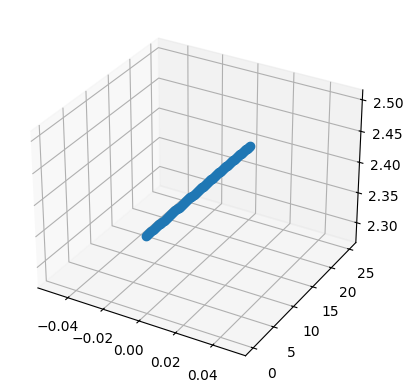

In [60]:
from matplotlib import pyplot as plt
fig = plt.figure()
# 3d 
ax = fig.add_subplot(111, projection='3d')
plt.plot(nodes["x"], nodes["y"], nodes["z"], 'o')
# aspect ratio
# ax.set_aspect('equal')

(np.float64(-2.1875),
 np.float64(32.1875),
 np.float64(-4.6875),
 np.float64(29.6875),
 np.float64(-15.068005),
 np.float64(10.713245))

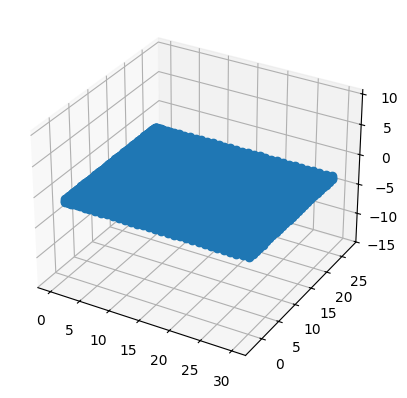

In [61]:
nodes = LAYERS[0].GetUniqueNodes(inp_f.nodes)

# 3d 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(nodes["x"], nodes["y"], nodes["z"], 'o')
# aspect ratio
plt.axis('equal')

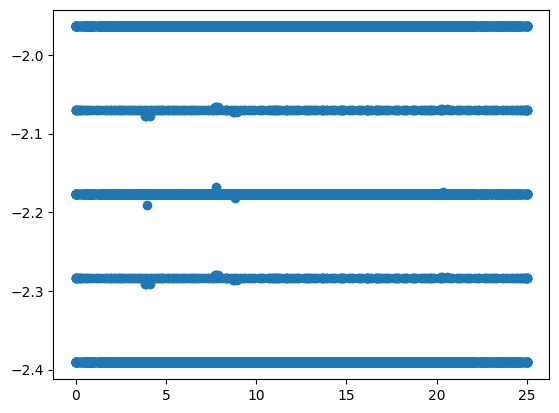

In [62]:

nodes = LAYERS[0].GetUniqueNodes(inp_f.nodes)

# 3d 
fig = plt.figure()
plt.plot(nodes["y"], nodes["z"], 'o')
# aspect ratio
# plt.axis('equal')

In [63]:
import numpy as np

In [64]:
St_layers = {
    "X"   : 96.70126,  # MPa
    "SX"  : 48.53641,  # MPa
    "Y"   : 646.68459,   # MPa
    "SY"  : 328.37188, # MPa
    "nucleo" : 0.0,
}

St_TFP = [ 279.1, 153.4 , 137.1 , 184.4 , 100.0 , 104.5 ]

St_TFP = [ 286.618016, 
           129.708636, 
           120.822382, 
           179.148760, 
           109.434802, 
           116.912912 ]

Sb_TFP = [ 567.670440,
           293.844643,
           316.626244,
           230.228757,
           182.207321,
           198.665883 ]

In [65]:
params["geo"]["Ly"]

25

In [66]:
params["geo"]["t_n"]

3.05701

In [67]:
from AnalyticalLayers.models import Tau_model

ni = [ len(c) for c in composition ]
tt = [ Tau_model(params["geo"]["t_n"],params["geo"]["t_l"],ini) for ini in ni ]

In [68]:
tt

[4.88333, 4.88333, 4.88333, 4.88333, 5.79649, 5.79649]

In [69]:
from scipy.interpolate import LinearNDInterpolator


In [70]:
 # interpo x,y,z,f

def PostProcessing(TPF):

    inp_f = inp(inps[TPF])
    ifrd = readfrd(frds[TPF])
    LAYERS =  inp_f.elements

    B = params["geo"]["Ly"]

    icomp = [ *composition[TPF][::-1] , "nucleo", *composition[TPF] ]

    print(icomp)

    rr = []
    L = 2*params["geo"]["Lx"]

    for data in ifrd["data_blocks"]:
        
        # ========================
        # Principal Stress
        # ========================
        P1s = []
        print("Time Step:")

        for idx in range(len(LAYERS)):
            nodes = LAYERS[idx].GetUniqueNodes(inp_f.nodes)

            zmin = nodes["z"].min()
            zuniques = nodes["z"].unique()
            zuniques = np.sort(zuniques)
            # print(zuniques)
            zmin = zuniques[0]

            # nodes = nodes[(nodes["x"] < 0.1*L  ) & \
            #               (nodes["z"] == zmin) ]
            # P1_list = data.loc[nodes.index]["P1"].values

            # arg = np.argmax(P1_list)
            # P1max = P1_list[arg]

            # nodes_value = np.array([    nodes["x"].values,
            #                             nodes["y"].values,
            #                             nodes["z"].values ]).T
            # print(nodes_value[arg])
            
            x0 = 0
            y0 = 0.5*params["geo"]["Ly"]/2
            z0 = zmin

            distancias = np.sqrt(   (nodes["x"] - x0)**2 + \
                                    (nodes["y"] - y0)**2 + \
                                    (nodes["z"] - z0)**2 )
            
            arg = np.argmin(distancias)
            print(nodes.iloc[arg].values)
            P1max = data.iloc[nodes.index[arg]]["P1"]

            
            P1s.append(P1max)



        P1s = np.array(P1s)
        

        nodes = inp_f.nodes
        NSET_LOAD = inp_f.select("NSET_LOAD","nset")
        NSET_LOAD.GetNodes(inp_f.nodes)
        F3 = data.loc[NSET_LOAD.GetNodes(inp_f.nodes).index]["F3"]
        F3 = -2*np.sum(F3) # Symmetry of Model

        # force
        B = params["geo"]["Ly"]
        D = tt[TPF]
        L = 2*params["geo"]["Lx"]

        #
        # Medimos la fuerza en la mitad del modelo 
        # y calculamos la transformación a la fuerza que se aplican en los datos experimentales
        #
        sigma_exp = (3/2)*F3*L/(B*D**2)

        r = { 
            "layers" : icomp,
            "P1" : P1s,
            "F3" : F3,
            "sigma_exp" : sigma_exp
        }
        rr.append(r)

    
    ly = len(LAYERS)

    P1s =[]
    for i in range(ly):
        P1s.append([ r["P1"][i] for r in rr ])

    F3s = [ r["F3"] for r in rr ]
    S3s = [ r["sigma_exp"] for r in rr ]


    fig = plt.figure(figsize=(4,4))
    colors = ["r","g","b"]

    
    for i,L in enumerate(P1s):
        if i>len(P1s)//2:
            break
        ly = rr[0]["layers"][i]
        St_layer = St_layers[ly]
        if ly != "nucleo":
            label = r"$\sigma_{max}^{"+ly + "} $ (FEM)"
            plt.plot(S3s,L,'.-',label=label,
                        color=colors[i])
            
            nSt = round(St_layer,1)
            label = r"$\sigma_{"+ly+"} = " + str(nSt) + r" \ MPa$ (analytical)"
            plt.axhline(St_layer,
                        linestyle="--",
                        color=colors[i],
                        label=label)
            
            
            
    plt.ylabel(r"$\sigma_{max}^{i}$ [MPa]",fontsize=12)
    plt.xlabel(r"$\sigma_{TFP" + str(TPF+1) + "}$ [MPa]",fontsize=12)
    #  Mpa vertical line

    #
    # plt.axvline(Sb_TFP[TPF],linestyle="--",
    #             color="k",
    #             label=r"$\sigma_{TPF"+str(TPF+1)+"} = " + str(Sb_TFP[TPF]) + r" \ MPa$")
    
    # franja de error 10%
    ylim = plt.gca().get_ylim()
    plt.fill_betweenx([-100,1000],
                        Sb_TFP[TPF]*0.95,
                        Sb_TFP[TPF]*1.05,
                        alpha=0.2,
                        color="k",
                        label=r"$\sigma_{TPF"+str(TPF+1)+"} = " + str(Sb_TFP[TPF]) + r" \ MPa \pm 10 \%$")
    plt.ylim(ylim)
    # Lo cambiamos por una franja con error 10%
    # ylims = plt.gca().get_ylim()
    # plt.fill_betweenx([-100,1000],
    #                   St_TFP[TPF]*0.95,
    #                   St_TFP[TPF]*1.05,
    #                   alpha=0.2,
    #                   color="k",
    #                   label=r"$ \sigma_{TPF"+str(TPF+1)+"} \pm 10 \%$")
    # plt.ylim(ylims)
    plt.grid()
    # outside

    
    ly = len(LAYERS)
    P1s_end = [ P1[-1] for P1 in P1s ]
    P1s_end = np.array(P1s_end)
    P1s_end = P1s_end[ : ly%2 +1  ]

    alpha = P1s_end/S3s[-1]

    sigma_an =  [ St_layers[ly] for ly in icomp[:ly%2 +1 ] ]
    sigma_an = np.array(sigma_an)

    
    S3_pred = np.min(sigma_an/alpha)

    plt.axvline(S3_pred,linestyle="--",
                color="m",
                label=r"$\sigma_{pred} = " + str(round(S3_pred,1)) + r" \ MPa$")




    plt.title("TFP "+str(TPF+1) + " | Composition: " + str(icomp) )

    plt.legend( bbox_to_anchor=(1.05, 1), 
        loc='upper left', 
        borderaxespad=0.)
    
    
    
    return rr

['Y', 'Y', 'nucleo', 'Y', 'Y']
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]


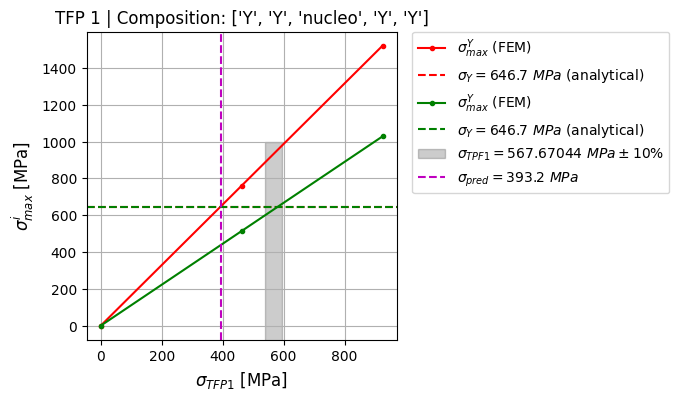

In [71]:
rr = PostProcessing(0)

['X', 'Y', 'nucleo', 'Y', 'X']
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]


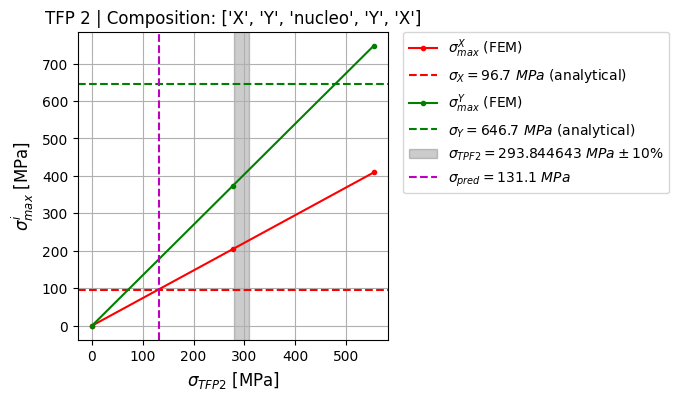

In [72]:
rr = PostProcessing(1)

['SX', 'Y', 'nucleo', 'Y', 'SX']
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]


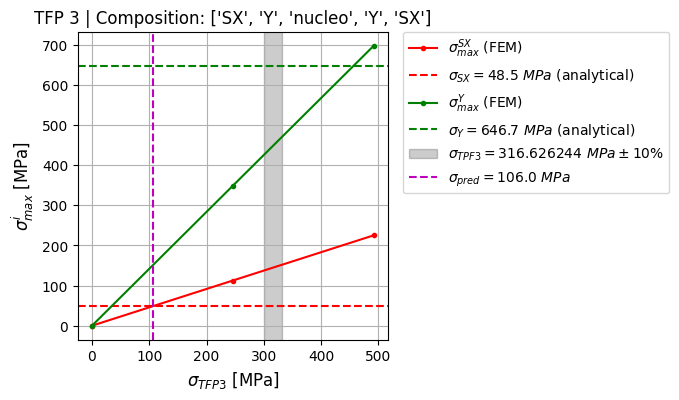

In [73]:
rr = PostProcessing(2)

['SY', 'Y', 'nucleo', 'Y', 'SY']
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
Time Step:
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]


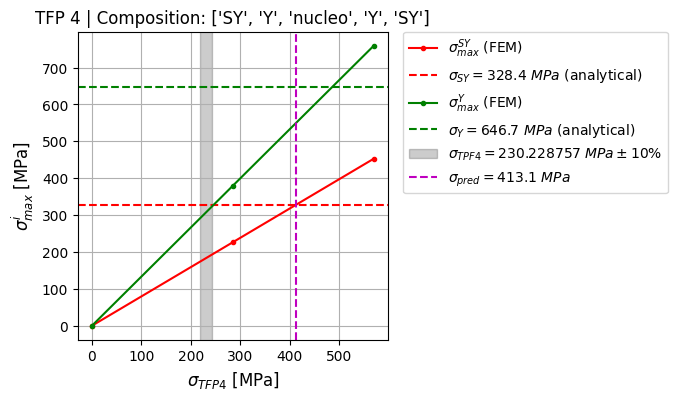

In [74]:
rr = PostProcessing(3)

['SY', 'SX', 'Y', 'nucleo', 'Y', 'SX', 'SY']
Time Step:
[ 0.       6.25    -2.81806]
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
[0.      6.25    2.39094]
Time Step:
[ 0.       6.25    -2.81806]
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
[0.      6.25    2.39094]
Time Step:
[ 0.       6.25    -2.81806]
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
[0.      6.25    2.39094]


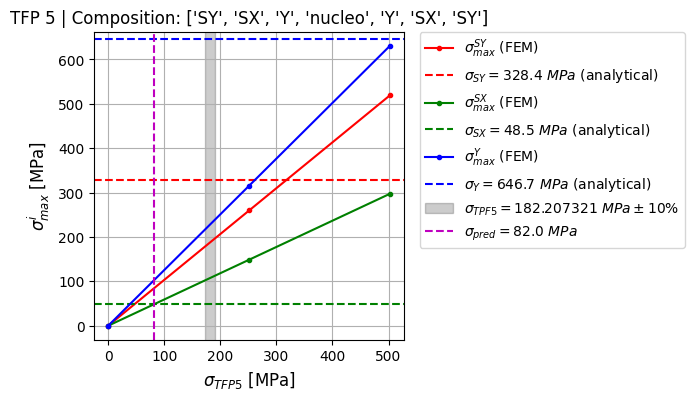

In [75]:
rr = PostProcessing(4)

['SY', 'X', 'Y', 'nucleo', 'Y', 'X', 'SY']
Time Step:
[ 0.       6.25    -2.81806]
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
[0.      6.25    2.39094]
Time Step:
[ 0.       6.25    -2.81806]
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
[0.      6.25    2.39094]
Time Step:
[ 0.       6.25    -2.81806]
[ 0.       6.25    -2.39094]
[ 0.       6.25    -1.96382]
[ 0.      6.25   -1.5367]
[0.     6.25   1.5367]
[0.      6.25    1.96382]
[0.      6.25    2.39094]


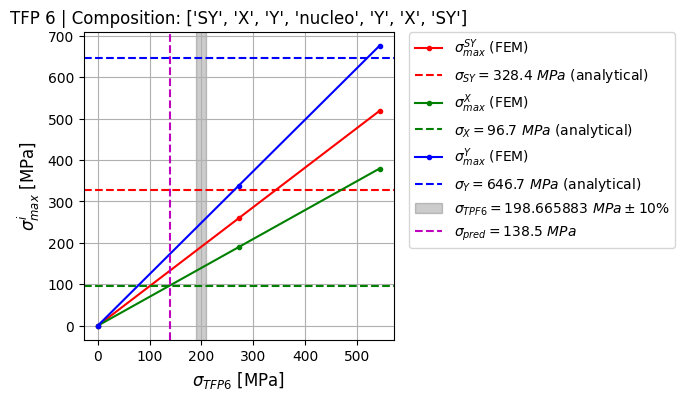

In [76]:
rr = PostProcessing(5)